TUGAS ANN

In [119]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_wine
# data = 'data/abalone.csv'
data = 'data/heart_failure.xls'
# df=pd.read_csv(data)


In [120]:
wine =load_wine()

col_names = list(wine.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[wine.data, wine.target], columns=col_names)

In [121]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [122]:
df.shape

(178, 14)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [124]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [125]:
round(df.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,0.94
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91,0.78
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,0.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50,0.00
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50,1.00
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00,2.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,2.00


Text(0.5, 1.05, 'Correlation of df Features')

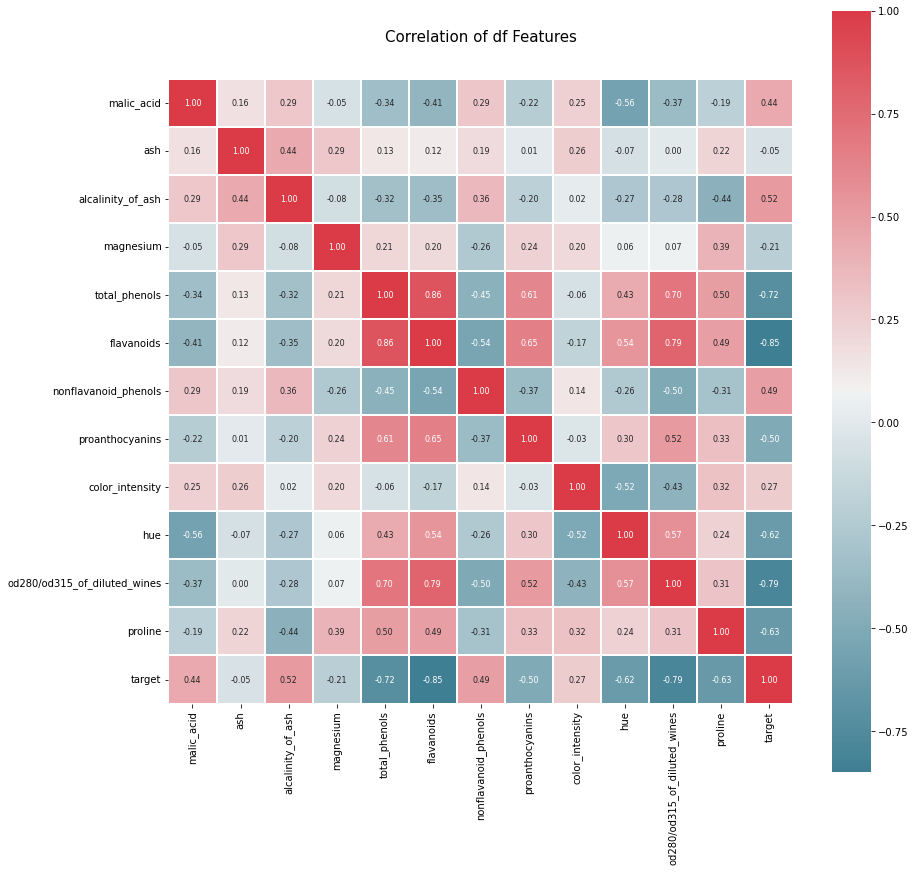

In [126]:


corr = df.iloc[:,1:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of df Features', y=1.05, size=15)



In [127]:

X=df.drop(["target"],axis=1)
y=df["target"]

In [128]:
from sklearn import preprocessing


col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T
y = np.reshape(y.values,(-1,1))

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.25,random_state=7)

In [130]:
cols = X_train.columns

In [131]:
X_train.shape, X_test.shape

((133, 13), (45, 13))

In [132]:
tf.compat.v1.disable_eager_execution()

In [133]:
X_tf = tf.compat.v1.placeholder(tf.compat.v1.float32, [None,13])
Y_tf = tf.compat.v1.placeholder(tf.compat.v1.float32, [None, 1])

In [134]:

W = tf.compat.v1.Variable(tf.compat.v1.random_normal([13,1], seed=0), name='weight')


# bias
b = tf.compat.v1.Variable(tf.compat.v1.random_normal([1], seed=0), name='bias')

In [135]:
logits = tf.matmul(X_tf,W) + b

In [136]:
hypothesis = tf.nn.sigmoid(logits)

cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y_tf)
cost = tf.reduce_mean(cost_i)

In [149]:
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

In [150]:
prediction = tf.compat.v1.cast(hypothesis > 0.5, dtype=tf.float32)
correct_prediction = tf.compat.v1.equal(prediction, Y_tf)
accuracy = tf.compat.v1.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

In [139]:
print("X train shape =", X_train.shape)
print("Y train shape =", y_train.shape)
print("X test shape =", X_test.shape)
print("Y test shape =", y_test.shape)


X train shape = (133, 13)
Y train shape = (133, 1)
X test shape = (45, 13)
Y test shape = (45, 1)


# AKTIVASI MODEL

In [151]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X_tf: X_train, Y_tf: y_train})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X_tf: X_train, Y_tf: y_train})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X_tf: X_train, Y_tf: y_train})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X_tf: X_test, Y_tf: y_test})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

Step:     0	Loss: 0.978	Acc: 39.10%
Step:  1000	Loss: -0.048	Acc: 39.10%
Step:  2000	Loss: -0.520	Acc: 60.90%
Step:  3000	Loss: -1.162	Acc: 66.92%
Step:  4000	Loss: -1.692	Acc: 67.67%
Step:  5000	Loss: -2.221	Acc: 70.68%
Step:  6000	Loss: -2.812	Acc: 72.93%
Step:  7000	Loss: -3.473	Acc: 72.93%
Step:  8000	Loss: -4.181	Acc: 72.93%
Step:  9000	Loss: -4.823	Acc: 72.93%
Step: 10000	Loss: -5.528	Acc: 72.93%
Model Prediction = 0.7293233
Test Prediction = 0.51111114


MLP

In [141]:
X_tf = tf.compat.v1.placeholder(tf.compat.v1.float32, [None,13])
Y_tf = tf.compat.v1.placeholder(tf.compat.v1.float32, [None, 1])

In [142]:
W1 = tf.compat.v1.Variable(tf.compat.v1.random_normal([13,26], seed=0), name='weight')
b1 = tf.compat.v1.Variable(tf.compat.v1.random_normal([26], seed=0), name='bias')
layer1 = tf.matmul(X_tf,W) + b1

In [143]:
W2 = tf.Variable(tf.compat.v1.random_normal([26,26], seed=0), name='weight2')
b2 = tf.Variable(tf.compat.v1.random_normal([26], seed=0), name='bias2')
layer2 = tf.nn.sigmoid(tf.matmul(layer1,W2) + b2)

    # hidden2
W3 = tf.Variable(tf.compat.v1.random_normal([26,39], seed=0), name='weight3')
b3 = tf.Variable(tf.compat.v1.random_normal([39], seed=0), name='bias3')
layer3 = tf.nn.sigmoid(tf.matmul(layer2,W3) + b3)

    # output
W4 = tf.Variable(tf.compat.v1.random_normal([39,1], seed=0), name='weight4')
b4 = tf.Variable(tf.compat.v1.random_normal([1], seed=0), name='bias4')
logits = tf.matmul(layer3,W4) + b4
hypothesis = tf.nn.sigmoid(logits)

In [144]:
cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y_tf)
cost = tf.reduce_mean(cost_i)

In [145]:
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
correct_prediction = tf.equal(prediction, Y_tf)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))


In [146]:
print("\n============Processing============")
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X_tf: X_train, Y_tf: y_train})
        if step % 1000 == 0:
           loss, acc = sess.run([cost, accuracy], feed_dict={X_tf: X_train, Y_tf: y_train})
           print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
    train_acc = sess.run(accuracy, feed_dict={X_tf: X_train, Y_tf: y_train})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X_tf: X_test, Y_tf: y_test})
       
    print("\n============Results============")
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)
   
   



============Processing============
Step:     0	Loss: 0.978	Acc: 39.10%
Step:  1000	Loss: -0.048	Acc: 39.10%
Step:  2000	Loss: -0.520	Acc: 60.90%
Step:  3000	Loss: -1.162	Acc: 66.92%
Step:  4000	Loss: -1.692	Acc: 67.67%
Step:  5000	Loss: -2.221	Acc: 70.68%
Step:  6000	Loss: -2.812	Acc: 72.93%
Step:  7000	Loss: -3.473	Acc: 72.93%
Step:  8000	Loss: -4.181	Acc: 72.93%
Step:  9000	Loss: -4.823	Acc: 72.93%
Step: 10000	Loss: -5.528	Acc: 72.93%

============Results============
Model Prediction = 0.7293233
Test Prediction = 0.51111114


PREDICTION

In [148]:

test_id = X_test['alcohol']
sub = pd.DataFrame()
sub['id'] = test_id
sub['Predict_Type'] = test_predict.astype(int)
sub['Origin_Type'] = y_test
sub['Correct'] = test_correct
sub.head(10)



,id,Predict_Type,Origin_Type,Correct
147,-0.161348,1,2.0,False
36,0.345111,0,0.0,True
167,-0.223111,1,2.0,False
171,-0.284874,1,2.0,False
126,-0.704864,1,1.0,True
133,-0.371343,1,2.0,False
102,-0.816038,1,1.0,True
32,0.839217,0,0.0,True
120,-1.915424,1,1.0,True
143,0.765101,1,2.0,False
